In [29]:
#!pip3 install opencv-python
import random
import pickle

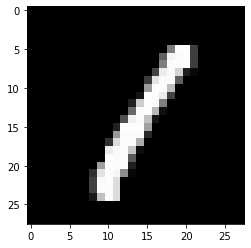

In [2]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
import cv2
import numpy as np

(x_train,y_train),(x_test, y_test) = tf.keras.datasets.mnist. load_data()
plt.imshow(x_train[3], cmap="gray")

In [3]:
x_train[0].shape

(28, 28)

In [4]:
28*28

784

In [5]:
# x_train = x_train/255.0
# x_test = x_test/255.0

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
encoder_input = keras.Input (shape= (28,28,1), name= "img")
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(32, activation="relu")(x)
encoder = keras.Model(encoder_input, encoder_output, name= "encoder")

hidden_layer = keras.layers.Dense(16, activation="relu")(encoder_output)
# hidden_layer_output = keras.layers.Dense(784, activation="relu")
# hidden_layer = keras.Model(hidden_layer_input, hidden_layer_output , name="hidden_layer")

decoder_input = keras.layers.Dense(784, activation="relu")(hidden_layer)
decoder_output = keras.layers.Reshape((28, 28, 1))(decoder_input)
opt = keras.optimizers.Adam (lr=0.001, decay = 1e-6)
autoencoder = keras.Model (encoder_input, decoder_output, name= "autoencoder")
autoencoder.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 784)               13328     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                            

2022-11-14 00:48:33.771693: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-14 00:48:33.771827: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/hardik/miniforge3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
autoencoder.compile(opt, loss="mse")
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3


2022-11-14 00:48:33.921436: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-14 00:48:34.041182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1687/1688 [============================>.] - ETA: 0s - loss: 2517.9163

2022-11-14 00:48:43.447980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 10s 6ms/step - loss: 2517.7280 - val_loss: 2100.7307
Epoch 2/3
1688/1688 [==============================] - 10s 6ms/step - loss: 2082.8818 - val_loss: 2057.7083
Epoch 3/3
1688/1688 [==============================] - 10s 6ms/step - loss: 2056.2410 - val_loss: 2038.8846


In [9]:
example = encoder.predict([x_test[0].reshape(-1,28,28,1)])[0]

2022-11-14 00:49:04.281602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [10]:
print(example)

[ 832.9618    480.10812   564.7       222.83333    36.055923    0.
    0.        319.3051    601.54114   129.44649   106.43498   454.9458
 1320.8624      0.        660.17645   106.126366  862.1827      0.
  245.64856     0.        402.06      589.2982    194.33632   197.57771
 1172.6293      0.        289.38376   169.75179   506.4559      0.
  125.488106    0.      ]


In [11]:
example.shape

(32,)

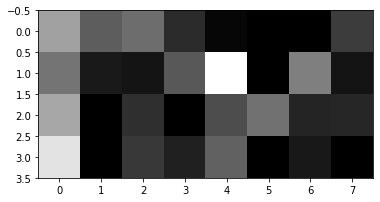

In [12]:
plt.imshow(example.reshape(4,8), cmap="gray")

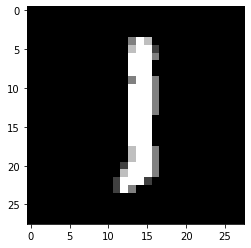

In [13]:
ex = x_test[14]
# noise = np.random.normal(0.5,0.3,20)
# ex.add
plt.imshow(ex,cmap="gray")

2022-11-14 00:49:04.511800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


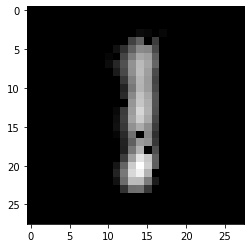

In [14]:
ae_out = autoencoder.predict([ex.reshape(-1,28,28,1)])[0]
plt.imshow(ae_out,cmap="gray")

In [21]:
def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = random.uniform(0, 255)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

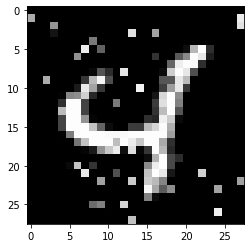

In [22]:
noisy = add_noise(x_test[67])
plt.imshow(noisy, cmap="gray")

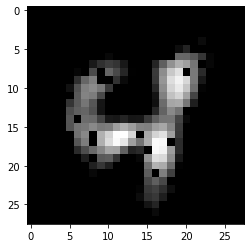

In [23]:
ae_out = autoencoder.predict([noisy.reshape(-1,28,28,1)])[0]
plt.imshow(ae_out,cmap="gray")

In [34]:
weights, biases = autoencoder.layers[2].get_weights()
print(weights.shape, biases.shape)

(784, 32) (32,)


In [25]:
print(weights)


[[-0.01805924 -0.0506134  -0.05062677 ... -0.07805165  0.06564782
   0.03365381]
 [ 0.034607    0.01408476 -0.01732372 ... -0.07622685  0.0546058
   0.04897649]
 [ 0.07576636  0.06691051 -0.07630643 ...  0.04732684 -0.03246831
   0.06722856]
 ...
 [ 0.0839861   0.01075493 -0.01516391 ... -0.02894505  0.01463134
   0.04509064]
 [-0.059703    0.08342382 -0.03611593 ...  0.08126774  0.04778106
   0.05638077]
 [ 0.06899069  0.07598411  0.06288134 ... -0.06847169 -0.06316431
  -0.01809844]]


In [26]:
print(biases)

[ 0.5535492  -0.3112244  -0.27359727 -0.03129214 -0.19915672 -0.02693538
 -0.01888647 -0.18738593 -0.69543195 -0.8858259  -0.05096485 -0.528254
  0.5968227  -0.03162191 -0.23104355  0.12808684  0.14308491 -0.03892448
 -0.20621523  0.5568194  -0.16498959 -0.6662923  -0.52106625 -0.3266461
  0.7516344  -0.03088316  0.32347143  0.15917024 -0.401895   -0.01992489
  0.33622238  0.9049463 ]


In [35]:
for i in range (2,5):
  weights, biases = autoencoder.layers[i].get_weights()
  with open ("../data/model_weights.dat", "ab") as f:
    pickle.dump(weights,f)
  with open ("../data/model_biases.dat", "ab") as f:
    pickle.dump(biases,f)

In [37]:
autoencoder.save_weights("../data/saved_model")

In [38]:
autoencoder.save("../data/autoencoder_save")

INFO:tensorflow:Assets written to: ../data/autoencoder_save/assets


2022-11-14 01:05:16.195084: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
